In [1]:
#%matplotlib widget

In [2]:
import sys 
sys.path.append('/Users/mbvalentin/scripts/wsbmr/dev')
sys.path.append('/Users/mbvalentin/scripts/fkeras')
sys.path.append('/Users/mbvalentin/scripts/qkeras')
sys.path.append('/Users/mbvalentin/scripts/DynamicTable')
sys.path.append('/Users/mbvalentin/scripts/tensorplot')

""" Basic modules """
import os 

""" Data exploration & manipulation """
import numpy as np

""" Let's add our custom wsbmr code """
import wsbmr

""" Tensorflow """
import tensorflow as tf

Adding /Users/mbvalentin/scripts/wsbmr/dev to sys.path
                   ▗ ▚ ▜  ▘   ▝▖▖  
   𐌍 ↠⌾↞ 𐌃 𐌖 𐌔      ▘ ▞▘ ▙ ▛▗    ▙ 
                       ▖  ▘▞   ▙▘▜ 

Logging to file: /Users/mbvalentin/.nodus/nodus_20250203_140640.log


-- Date: 03/Feb/2025
╭───────┬─────────────╮
╰ INFO ─┤ 14:06:40.12 │ - Nodus initialized
        │ 14:06:40.12 │ - Nodus version: 0.1.0
        │ 14:06:40.12 │ - Nodus imported
        │ 14:06:40.12 │ - Jobs imported
        │ 14:06:40.12 │ - JobManager imported
        │ 14:06:40.12 │ - Nodus ready to use
        │ 14:06:40.31 │ - Created jobs table in NodusDB instance 'wsbmr_db'
        │ 14:06:40.31 │ - Created job_dependencies table in NodusDB instance 'wsbmr_db'
        │ 14:06:40.31 │ - Added NodusDB instance 'wsbmr_db' linked to database 'wsbmr_db'


# 1. Create benchmark with dataset and model

In [3]:
# Define benchmark to be used 
benchmark = ['tinyml_anomaly_detection','tinyml_human_activity_recognition', 'svhn_hls4ml'
             'tinyml_person_detection', 'tinyml_cifar10_resnetv1',
             'svhn_hls4ml', 'mnist_hls4ml', 'mnist_lenet5', 'cifar10_resnet18',
             'mnist_squeezenet', 'cifar10_squeezenet',
             'ECONT_AE', 'dummy', 'autompg']

#benchmark = 'mnist_hls4ml'
#benchmark = 'dummy'
#benchmark = 'autompg'
#benchmark = 'ECONT_AE'
#benchmark = 'autompg'
#benchmark = 'tinyml_anomaly_detection'
#benchmark = 'tinyml_person_detection'
#benchmark = 'mnist_lenet5'
#benchmark = 'keyword_spotting'
#benchmark = 'mnist_squeezenet'
benchmark = 'smartpixel_small'

# For now you can run on:
# custom_svhn_cnn, custom_mnist_cnn, tinyml_human_activity_recognition, tinyml_person_detection

In [4]:
""" Define paths """
# Workdir definition
root_dir = '/Users/mbvalentin/scripts/wsbmr'
benchmarks_dir = os.path.join(root_dir, 'benchmarks' )
datasets_dir = os.path.join(root_dir, 'datasets')
#os.makedirs(workdir, exist_ok = True)

# Load yaml
benchmarks_config = wsbmr.config.BENCHMARKS_CONFIG

In [5]:
""" Setup some variables that we will need while loading benchmark """
#verbose = True
#exclude_zero = True

""" Benchmark settings """
load_weights = True
plot = True

""" Quantization settings """
bits_config = {'num_bits': 6, 'integer': 0}

""" Model settings """
train_model = False
save_weights_checkpoint = True # Save weights every epoch

""" WSBMR Ranking params """
normalize = True
overwrite_ranking = False
reload_ranking = True

rerun_experiment = overwrite_ranking or train_model

""" Pruning parameters (if pruning or not) """
prune = 0.0
model_prefix = f'pruned_{prune}_' 

benchmarks_config = wsbmr.config.BENCHMARKS_CONFIG


### Create benchmark object

In [6]:
""" Build benchmark object """
bmk = wsbmr.get_benchmark(benchmark, bits_config = bits_config, datasets_dir = datasets_dir, benchmarks_dir = benchmarks_dir, 
                            load_weights = load_weights, model_prefix = model_prefix, **benchmarks_config[benchmark])

# Print dataset and model summary
if plot:
    bmk.plot_dataset(subset = 'train', title = 'Training', to_file = True, num_samples = 100)
    bmk.plot_dataset(subset = 'validation', title = 'Validation', to_file = True, num_samples = 100)
    bmk.dataset_summary()
    bmk.model_summary(to_file = True)
    bmk.model_summary(to_file = True, quantized = True)
    #if benchmark != 'ECONT_AE': bmk.plot_model(verbose = False)

# Save benchmark object
bmk.save()

╭───────┼─────────────┤
╰ BMK ──┤ 14:06:41.93 │ - Initializing benchmark object smartpixel_small
        │ 14:06:41.94 │ - Loss categorical_crossentropy found in tf.keras.losses with definition <function categorical_crossentropy at 0x179a12200>.
        │ 14:06:41.96 │ - Adding custom metric categorical_accuracy with definition CategoricalAccuracy(name=categorical_accuracy,dtype=float32).


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input1 (InputLayer)         [(None, 13)]              0         
                                                                 
 dense1 (QDense)             (None, 58)                812       
                                                                 
 batch_normalization (BatchN  (None, 58)               232       
 ormalization)                                                   
                                                                 
 q_activation (QActivation)  (None, 58)                0         
                                                                 
 dense2 (QDense)             (None, 3)                 177       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                             

        │ 14:06:42.78 │ - No path provided, looking for latest h5 file at default model path: /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/6bits_0int/pruned_0.0_smartpixeldense/models
        │ 14:06:42.78 │ - Looking for file /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/6bits_0int/pruned_0.0_smartpixeldense/models/pruned_0.0_smartpixeldense.keras.latest
╭───────┼─────────────┤
╰ WARN ─┤ 14:06:42.78 │ - Weights file /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/6bits_0int/pruned_0.0_smartpixeldense/models/pruned_0.0_smartpixeldense.keras.latest not found
╭───────┼─────────────┤
╰ BMK ──┤ 14:06:42.78 │ - Benchmark object smartpixel_small initialized
╭───────┼─────────────┤
╰ DATA ─┤ 14:06:42.81 │ - SmartPixel Training set (45415, 13), (45415, 3)
        │ 14:06:42.81 │ - SmartPixel Test set (11113, 13), (11113, 13)
        │ 14:06:42.81 │ - File /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/datasetTraining_train.png already exist

[INFO] - Loading session with batch_size = 1024, epochs = 150, opt_params = {}, pruning_params = {}


╭───────┼─────────────┤
╰ BMK ──┤ 14:06:54.42 │ - Loading session from file /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/6bits_0int/pruned_0.0_smartpixeldense/sessions/training_session.20250203_134531/training_session.20250203_134531.pkl
╭───────┼─────────────┤
╰ MDL ──┤ 14:06:54.52 │ - Compiling model with parameters 


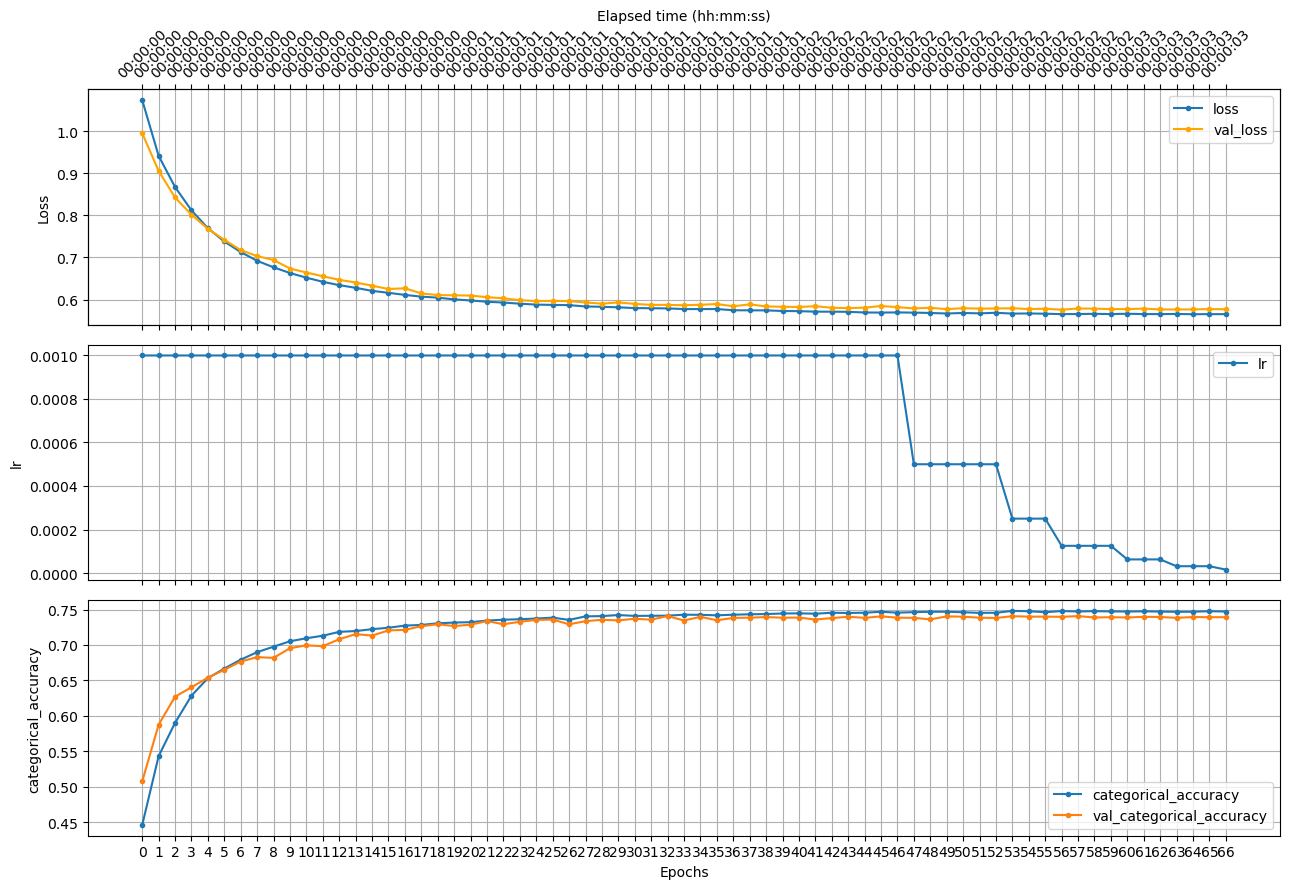

/Users/mbvalentin/scripts/wsbmr/dev/wsbmr/utils/plot.py:595: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pts = pd.DataFrame(shapes).T.plot.pie(ax = ax, subplots = True)


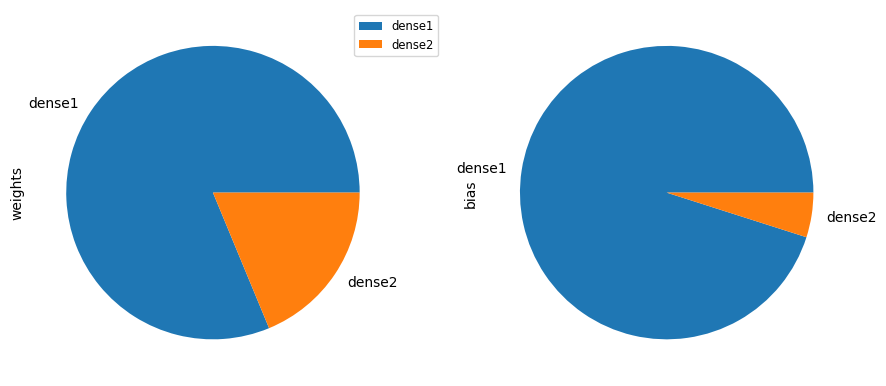

╭───────┼─────────────┤
╰ PLOT ─┤ 14:06:55.51 │ - Layer dense1: % of zeros = 0.0
        │ 14:06:55.51 │ - Layer dense2: % of zeros = 0.0
        │ 14:06:55.59 │ - Saved sparsity plot to /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/6bits_0int/pruned_0.0_smartpixeldense/sessions/training_session.20250203_134531/sparsity.png


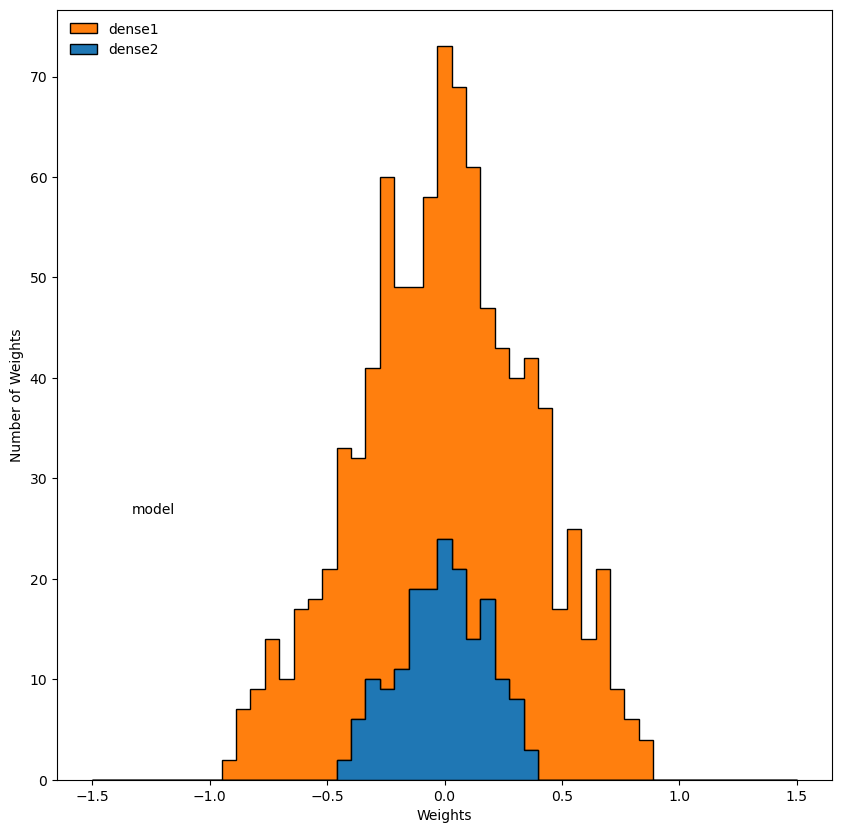

        │ 14:06:56.06 │ - Saved sparsity plot to /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/6bits_0int/pruned_0.0_smartpixeldense/sessions/training_session.20250203_134531/sparsity_separated.png


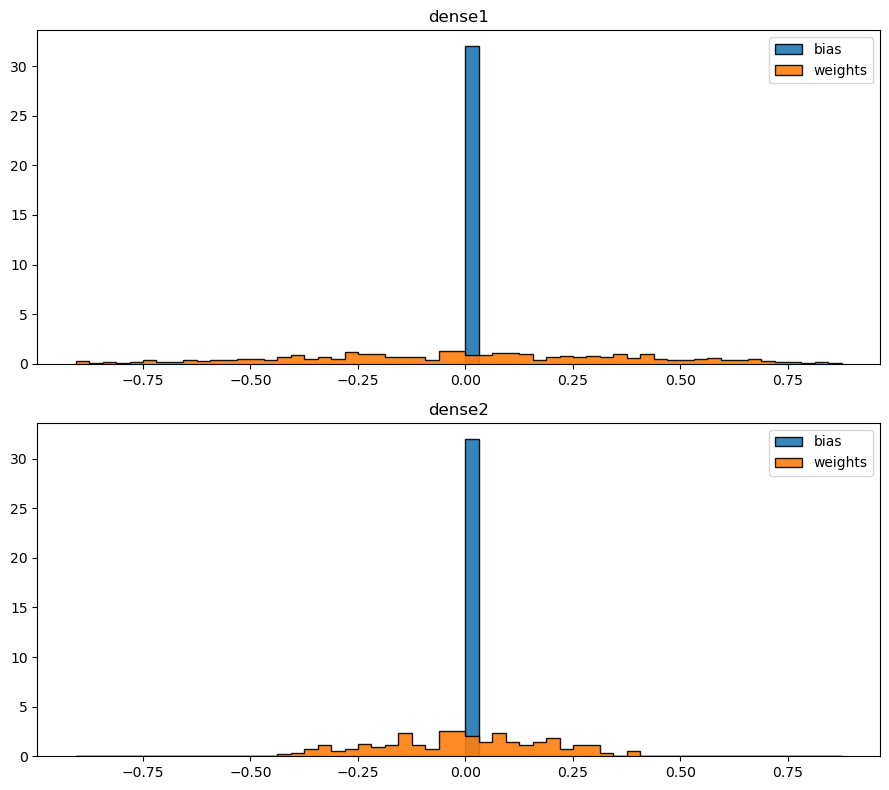

348/348 [==============================] - 0s 352us/step


        │ 14:06:56.46 │ - QKeras 6-bit accuracy = 42.45%
        │ 14:06:56.55 │ - Saved ROC plot to /Users/mbvalentin/scripts/wsbmr/benchmarks/smartpixel_small/6bits_0int/pruned_0.0_smartpixeldense/sessions/training_session.20250203_134531/ROC.png


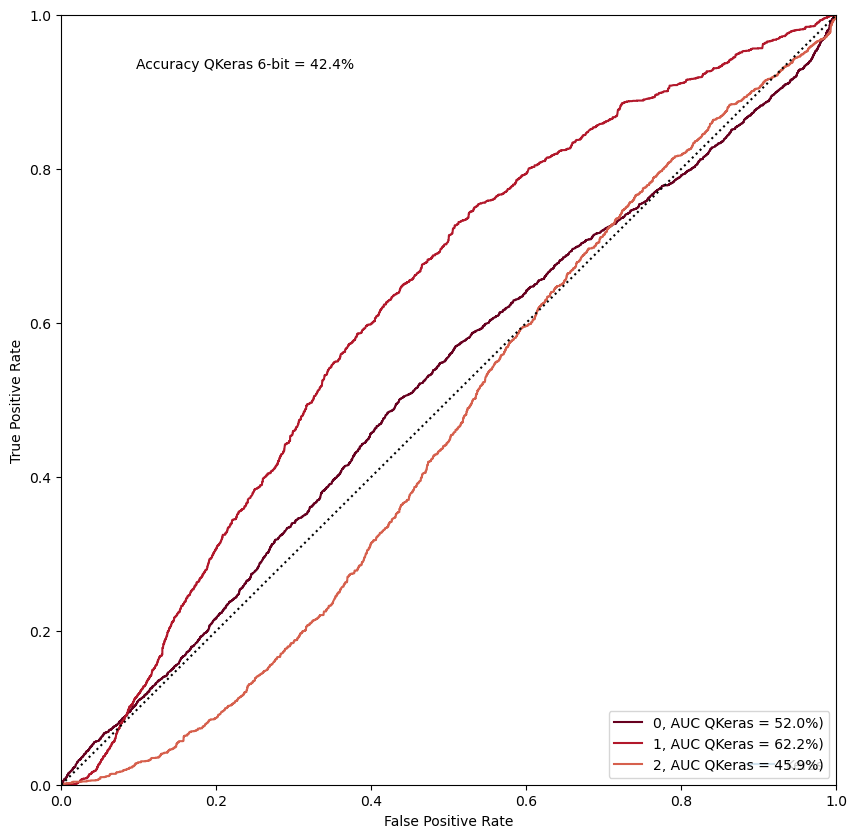

In [7]:
# Parse config
session_params = wsbmr.utils.parse_config(benchmarks_config[benchmark])

# Try to find the latest session and load 
sess = wsbmr.load_session(bmk.sessions_dir, latest = True)

""" Fit params """
if train_model or sess is None:

    # Loop thru sessions
    for sp in session_params:
        
        """ Optimizer params """
        opt_params = sp['optimizer_params']
        batch_size = sp['batch_size']
        epochs = sp['epochs']
        pruning_params = {}
        if prune > 0.0:
            pruning_params = sp['pruning_params']
            pruning_params['final_sparsity'] = prune

        
        # Print info 
        print(f'[INFO] - Running session with batch_size = {batch_size}, epochs = {epochs}, opt_params = {opt_params}, pruning_params = {pruning_params}')

        callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
        ]

        if prune:
            callbacks.append(wsbmr.pruning_callbacks.UpdatePruningStep())

        # Compile model 
        bmk.compile(opt_params = opt_params, pruning_params = pruning_params, batch_size = batch_size)

        # Run fitting
        sess, logs = bmk.fit(batch_size = batch_size, epochs = epochs, callbacks = callbacks, prune = prune) #callbacks=[pruning_callbacks.UpdatePruningStep()]

        # Save session config and object
        sess.save()

        # Save weights into file
        bmk.save_weights(prefix = bmk.model_name)   

        # Plot training history
    sess.plot_training_history(logs, to_file = True)

    # Plot weight dist 
    bmk.plot_weight_pie(to_file = True, show = True)

    # Plot sparsity
    bmk.plot_sparsity(sess, to_file = True)
    bmk.plot_sparsity(sess, separated = True, to_file = True)

    # Evaluate model 
    bmk.evaluate(sess, to_file = True)

else:

    # Parse 
    opt_params = {}
    pruning_params = {}
    batch_size = 32
    if len(session_params) > 0:
        # Last session
        sp = session_params[-1]

        """ Optimizer params """
        opt_params = sp['optimizer_params']
        batch_size = sp['batch_size']
        epochs = sp['epochs']
        pruning_params = sp['pruning_params'] if prune else {}
        
        # Print info 
        print(f'[INFO] - Loading session with batch_size = {batch_size}, epochs = {epochs}, opt_params = {opt_params}, pruning_params = {pruning_params}')

        callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
        ]

        if prune:
            callbacks.append(wsbmr.pruning_callbacks.UpdatePruningStep())

    # Compile model 
    bmk.compile(opt_params = opt_params, pruning_params = pruning_params, batch_size = batch_size)

    # Get logs 
    logs = sess.logs

    # Plot training history
    sess.plot_training_history(logs, to_file = False)

    # Plot weight dist 
    bmk.plot_weight_pie(to_file = False, show = True)

    # Plot sparsity
    bmk.plot_sparsity(sess, to_file = True)
    bmk.plot_sparsity(sess, separated = True, to_file = True)

    # Evaluate model 
    bmk.evaluate(sess, to_file = True)


# 4. Run experiment for all methods

In [7]:
""" Define params and configs for all tests """
batch_size = 10000
num_reps = 10
#rad_range = np.arange(0.005, 0.055, step=0.005)
rad_range = np.logspace(-3, -1, num=10, base = 10)
tmr_range = np.arange(0.0, 1.0, step = 0.2)

config_per_methods = [('hessiandelta', {'suffix': 'ranking_same', 'kws': {'ranking_method': 'same', 'batch_size': 480}}),
                     ('hessiandelta', {'suffix': 'ranking_hierarchical', 'kws': {'ranking_method': 'hierarchical', 'batch_size': 480}}),
                     ('hessian', {'suffix': 'ranking_msb', 'kws': {'ranking_method': 'msb', 'batch_size': 480}}),
                     ('hessian', {'suffix': 'ranking_same', 'kws': {'ranking_method': 'same', 'batch_size': 480}}),
                     ('hessian', {'suffix': 'ranking_hierarchical', 'kws': {'ranking_method': 'hierarchical', 'batch_size': 32}}),
                     ('hiresdelta', {'suffix': None, 'kws': {'times_weights': True, 'ascending': False, 'normalize_score': True, 'batch_size': 1000}}),
                     ('hiresdelta', {'suffix': None, 'kws': {'times_weights': True, 'ascending': False, 'normalize_score': False, 'batch_size': 1000}}),
                     ('hirescam', {'suffix': None, 'kws': {'times_weights': True, 'ascending': False, 'normalize_score': False, 'batch_size': 1000}}),
                     ('hirescam', {'suffix': None, 'kws': {'times_weights': True, 'ascending': False, 'normalize_score': True, 'batch_size': 1000}}),
                     ('hiresdelta', {'suffix': None, 'kws': {'times_weights': False, 'ascending': False, 'normalize_score': True, 'batch_size': 1000}}),
                     ('hiresdelta', {'suffix': None, 'kws': {'times_weights': False, 'ascending': False, 'normalize_score': False, 'batch_size': 1000}}),
                     ('hirescam', {'suffix': None, 'kws': {'times_weights': False, 'ascending': False, 'normalize_score': False, 'batch_size': 1000}}),
                     ('hirescam', {'suffix': None, 'kws': {'times_weights': False, 'ascending': False, 'normalize_score': True, 'batch_size': 1000}}),
                     ('weight_abs_val', {'suffix': None, 'kws': {'ascending': False}}),
                     #('bitwise',{'suffix':'lsb_to_msb', 'kws': {'ascending': False}}),
                     ('bitwise',{'suffix':'msb_to_lsb', 'kws': {'ascending': True}}),
                     ('layerwise',{'suffix':'first_to_last', 'kws': {'ascending': True}}),
                     ('layerwise',{'suffix':'last_to_first', 'kws': {'ascending': False}}),
                     ('diffbitperweight',{'suffix': None}),
                     ('recursive_uneven', {'suffix': None}),
                     ('random',{'suffix': None}),
                    #('oracle', {'suffix': None, 'kws': {'metric': ['loss','activation'][0], 'batch_size': 1000}})
]

# ('hirescam', {'suffix': None, 'kws': {'times_weights': True, 'ascending': False, 'normalize_score': True, 'batch_size': 1000}}),
#config_per_methods = [                     ('hessian', {'suffix': 'ranking_msb', 'kws': {'ranking_method': 'msb', 'batch_size': 480}}),
#]

# config_per_methods = [('bitwise',{'suffix':'msb_to_lsb', 'kws': {'ascending': True}}),
#                       ('hessian', {'suffix': 'ranking_msb', 'kws': {'ranking_method': 'msb', 'batch_size': 32}}),
#                       ('hessian', {'suffix': 'ranking_hierarchical', 'kws': {'ranking_method': 'hierarchical', 'batch_size': 32}}),
#                      ]

# config_per_methods = [('hiresdelta', {'suffix': None, 'kws': {'ascending': False, 'normalize_score': True, 'batch_size': 1000}}),
#                       ('hiresdelta', {'suffix': None, 'kws': {'ascending': False, 'normalize_score': False, 'batch_size': 1000}})
# ]

#config_per_methods = [('hessian', {'suffix': 'delta_ranking_same', 'kws': {'ranking_method': 'same', 'batch_size': 32}})]
#config_per_methods = [('hiresdelta', {'suffix': None, 'kws': {'ascending': False, 'normalize_score': True, 'batch_size': 1000}})]

In [ ]:
# prepare data 
nsample_mod = 48 if 'ECON' in benchmark else -1
XYTrain = wsbmr.utils.prepare_data(bmk, subset = 'train', nsample_mod = nsample_mod)
rerun_experiment = False
#################################################################
# 2. Perform ranking according to method
#################################################################
for method, c in config_per_methods[::-1][0:1]:

    #################################################################
    # 1. Initialize experiment object
    #################################################################
    # Extend config dict
    c_ext = dict(**c, **{'normalize': normalize}, **{'bits_config': bits_config})

    # Get kws from config
    kws = c['kws'] if 'kws' in c else {}

    # Create experiment object 
    exp = wsbmr.Experiment(method, c_ext, bmk, reload_ranking = reload_ranking, verbose = True)

    # Print experiment info 
    print(exp)
    
    # Rank
    df = exp.rank(bmk.model, *XYTrain, verbose = True, **kws)

    # Save rank to csv file 
    exp.save_ranking(df, overwrite = overwrite_ranking)

    #################################################################
    # 3. Run experiment with given ranking and for whatever 
    #       range of tmr and rad 
    #################################################################
    exp.run_experiment(bmk, batch_size = batch_size, num_reps = num_reps, ber_range = rad_range, protection_range = tmr_range, rerun = False)


In [ ]:
raise ValueError('Stop here')

In [ ]:
""" Plot reconstruction """
X = bmk.dataset.dataset['train'][0]
# n = 48
# X = X[:-(X.shape[0] % n)]
# Xnorm = bmk.model.preprocess_input(X)

# Predict
Yhat = bmk.model.model.predict(X, batch_size = 480)


import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:100].flatten(), Yhat[:100].flatten())
plt.show()

import matplotlib.pyplot as plt
nsamples = 10
fig, axs = plt.subplots(nrows = nsamples, ncols = 2, figsize=(2*2, nsamples*2))
for i in range(nsamples):
    axs[i,0].imshow(Xnorm[i][...,0], cmap = 'gray')
    axs[i,1].imshow(Yhat[i][...,0], cmap = 'gray')
plt.tight_layout()
plt.show()


In [ ]:
import pulp
from tqdm.notebook import tqdm
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable, LpBinary


def solve_TMR_attack(deltas, XX, num_bits, verbose = True):

  # Create the prob
  prob = LpProblem(name="worst_TMR_attack", sense=LpMaximize)

  # Initialize the decision variables, which is our "S" matrix. We need to define it
  # in regards to the delta matrix, like so:
  if len(deltas.shape) == 3:
    index_set = [(i, j, b) for i in range(deltas.shape[0]) for j in range(deltas.shape[1]) for b in range(num_bits)]
  elif len(deltas.shape) == 5:
    index_set = [(i, j, k, f, b) for i in range(deltas.shape[0]) for j in range(deltas.shape[1]) for k in range(deltas.shape[2]) \
                    for f in range(deltas.shape[3]) for b in range(num_bits)]
  suscept = LpVariable.dicts('suscept', index_set, cat=LpBinary)

  # Variable to hold sum
  #sum_var = LpVariable('sum_var')
  #abs_sum_var = LpVariable('abs_sum_var')

  # Objective
  #prob += abs_sum_var

  # Add the objective
  nsamples = XX.shape[0]

  # Init var to hold the lpSums 
  lpSums = []

  if len(deltas.shape) == 3:
    for n in range(nsamples):
      print(f"Adding sample {n}")
      #for i,j,b in index_set:
        #z = LpVariable(f'sub_{n}_{i}_{j}_{b}', suscept[i, j, b] * deltas[i][j][b] * XX[n][i])
        #lpSums.append(suscept[i, j, b] * deltas[i][j][b] * XX[n][i])
        #prob += lpSum(suscept[i, j, b] * deltas[i][j][b] * XX[n][i])
      prob += lpSum(suscept[i, j, b] * deltas[i][j][b] * XX[n][i] for i, j, b in index_set)
  elif len(deltas.shape) == 5:
    total = nsamples*XX.shape[3]*deltas.shape[3]*num_bits
    count = 0
    with tqdm(total = total, desc = f'Processing sample') as pbar:
      for n in range(nsamples):
        #convolve2d(Xs[ly-1][n][...,0], deltas[...,0,0,0])
        for k in range(XX.shape[3]):
          for f in range(deltas.shape[3]):
            for b in range(num_bits):
              #print(f"Adding sample {n}, k = {k}, f = {f}, b = {b}")                
              subF = np.array([deltas[i][j][k][f][b] * suscept[i,j,k,f,b] for i in range(deltas.shape[0]) for j in range(deltas.shape[1])]).reshape(deltas.shape[:2])
              m, n = subF.shape
              y, x = XX[n].shape[:2]
              y = y - m + 1
              x = x - m + 1
              # Simulate convolution now 
              for i in range(y):
                  for j in range(x):
                    z = LpVariable(f'px_{n}_{k}_{f}_{b}_{i}_{j}', XX[n][i:i+m,i:i+m,k] * subF)
                    prob += lpSum(z*z)
              pbar.set_postfix({'sample': n, 'idx': (k,f,b)})
              pbar.update(1)
              count += 1


  # Constraints for sum
  #prob += sum_var == lpSum(lpSums)

  # Constraints for absolute value 
  #prob += abs_sum_var >= sum_var
  #prob += abs_sum_var >= -sum_var

  # Solve the problem
  status = prob.solve()

  suscept_opt = np.zeros(deltas.shape, dtype = np.int8)
  if len(deltas.shape) == 3:
    for (var, (i,j,b)) in zip(prob.variables(), index_set):
      #print(f"{var.name}: {var.value()}")
      suscept_opt[i][j][b] = int(var.value())
  elif len(deltas.shape) == 5:
    for (var, (i,j,k,f,b)) in zip(prob.variables(), index_set):
      #print(f"{var.name}: {var.value()}")
      suscept_opt[i][j][k][f][b] = int(var.value())

  # for (var, (i,j,b)) in zip(prob.variables(), index_set):
  #     #print(f"{var.name}: {var.value()}")
  #     suscept_opt[i][j][b] = int(var.value())

  print(f"status: {prob.status}, {LpStatus[prob.status]}")
  print(f"objective: {prob.objective.value()}")
  print(suscept_opt)

  return prob, status, suscept_opt